In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

In [4]:
# Пример данных
data = {
    'sleep_duration': [7, 6.5, 8, 7.5, 6],
    'water_intake': [1.5, 2.0, 1.8, 2.2, 2.5],
    'physical_activity': [30, 45, 40, 20, 50],
    'stress_level': [3, 4, 2, 5, 3]
}
df = pd.DataFrame(data)

In [5]:
# Целевая переменная и признаки
y = df['stress_level']
X = df.drop(columns=['stress_level'])

In [6]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Инициализация и обучение модели случайного леса
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# Создание объекта Explainer и вычисление SHAP значений
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

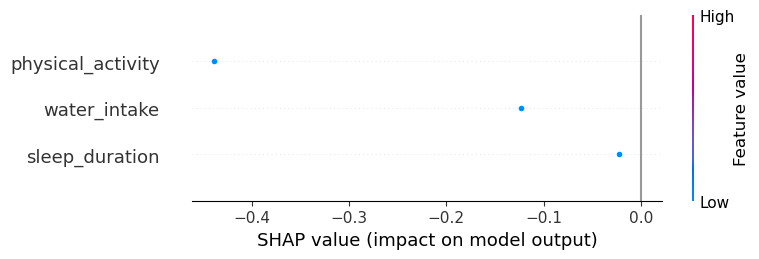

In [9]:
# Визуализация важности признаков
shap.summary_plot(shap_values, X_test)